# Illustrate how data augmentation can be done

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
# from keras.datasets import mnist     # Dataset too big for my laptop while doing CNN
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# (x_train, y_train ), (x_test, y_test) = mnist.load_data()

In [4]:
# # Intended Way but size of image is too big and time is too less
# from keras.datasets import mnist
# from keras.utils import to_categorical
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# x_train, x_val = x_train[:50000], x_train[50000:]
# y_train, y_val = y_train[:50000], y_train[50000:]

In [5]:
from sklearn import datasets
data = datasets.load_digits()
x = data.images
y = data.target

from keras.utils import to_categorical
x = x.reshape((x.shape[0], 8, 8, 1))
x = x.astype('float32')/255.0
y = to_categorical(y)
y

from sklearn.model_selection import train_test_split as tts
x_train, x_val, y_train, y_val = tts(x, y, test_size=0.25, random_state=42)

In [6]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)

In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(8,8,1), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
43/43 [==============================] - 1s 21ms/step - loss: 2.2988 - accuracy: 0.1232 - val_loss: 2.2905 - val_accuracy: 0.1778
Epoch 2/15
43/43 [==============================] - 2s 42ms/step - loss: 2.2817 - accuracy: 0.1670 - val_loss: 2.2614 - val_accuracy: 0.2400
Epoch 3/15
43/43 [==============================] - 1s 18ms/step - loss: 2.2460 - accuracy: 0.2480 - val_loss: 2.2029 - val_accuracy: 0.5889
Epoch 4/15
43/43 [==============================] - 1s 22ms/step - loss: 2.1877 - accuracy: 0.4900 - val_loss: 2.1061 - val_accuracy: 0.6333
Epoch 5/15
43/43 [==============================] - 1s 25ms/step - loss: 2.0990 - accuracy: 0.5865 - val_loss: 1.9701 - val_accuracy: 0.7644
Epoch 6/15
43/43 [==============================] - 1s 17ms/step - loss: 1.9865 - accuracy: 0.5642 - val_loss: 1.8029 - val_accuracy: 0.7978
Epoch 7/15
43/43 [==============================] - 1s 29ms/step - loss: 1.8507 - accuracy: 0.6177 - val_loss: 1.6340 - val_accuracy: 0.7978
Epoch 8/15
43

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

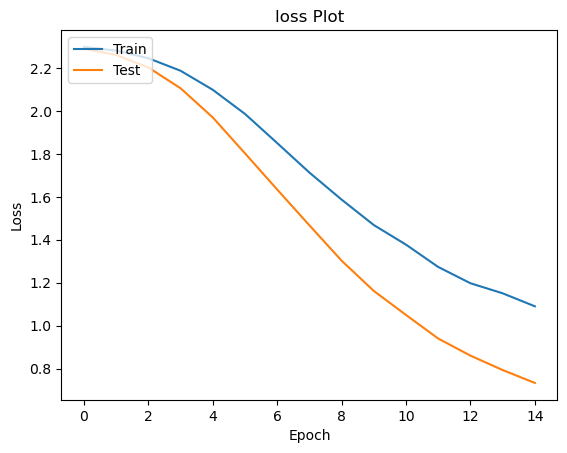

In [10]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

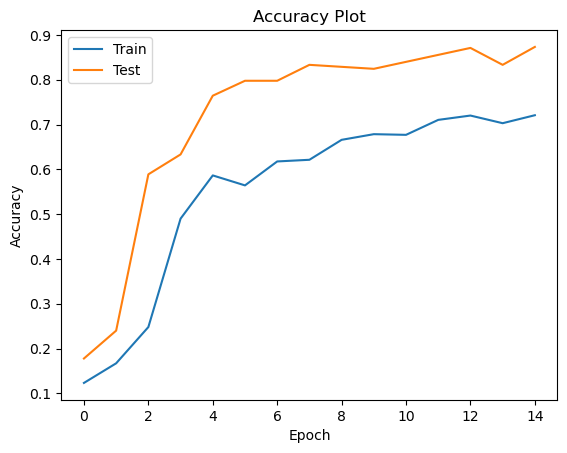

In [11]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()